# Lab | Customer Analysis Round 7

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

## Get the data
We are using the marketing_customer_analysis.csv file.

## Dealing with the data
Already done in rounds 2 to 7.

Bonus: Build a function, from round 2 and round 7, to clean and process the data.

## Explore the data
Done in the round 3.

## Modeling
Description:

Try to improve the linear regression model.

In [279]:
import pandas as pd
import numpy as np

In [280]:
data = pd.read_csv("./files_for_lab/csv_files/marketing_customer_analysis.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [281]:
# Processing Data (repeating):

## X-y split
## Normalization

In [282]:
import numpy as np

numerical = data.select_dtypes(include=np.number)
categorical = data.select_dtypes(include=np.object)
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [283]:
y = numerical['Total Claim Amount']
X = numerical.drop(['Total Claim Amount'], axis=1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [284]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

model = linear_model.LinearRegression()
model = model.fit(X,y)

print(model.intercept_)
print(model.coef_)

72.39096819184283
[-6.74723453e-04 -3.29341526e-03  5.34254540e+00 -1.45721018e-01
 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]


In [285]:
model.score(X, y)

0.5186628226558787

### Use the concept of multicollinearity and remove insignificant variables

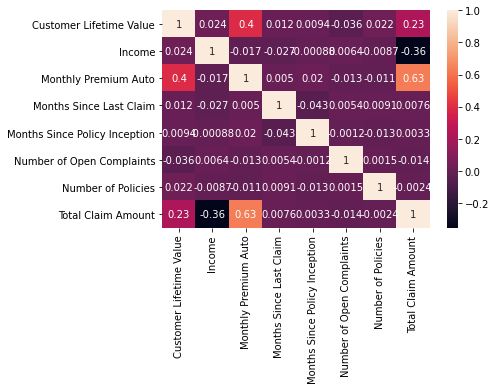

In [286]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [287]:
reduced_numerical = numerical.drop(['Number of Policies','Months Since Policy Inception','Months Since Last Claim','Number of Open Complaints'],axis=1)
reduced_numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Total Claim Amount'],
      dtype='object')

In [288]:
y = reduced_numerical['Total Claim Amount']
X = reduced_numerical.drop(['Total Claim Amount'],axis=1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto
0,2763.519279,56274,69
1,6979.535903,0,94
2,12887.431650,48767,108
3,7645.861827,0,106
4,2813.692575,43836,73
...,...,...,...
9129,23405.987980,71941,73
9130,3096.511217,21604,79
9131,8163.890428,0,85
9132,7524.442436,21941,96


In [289]:
model = linear_model.LinearRegression()
model = model.fit(X,y)

In [290]:
model.score (X,y)

0.5185218926553223

### Use a different method of scaling the numerical variables
#### Normalizing the data with Standardize

In [291]:
from sklearn.preprocessing import StandardScaler

Standardtransformer = StandardScaler()

Standardtransformer = StandardScaler().fit(numerical)
numerical_standardized = Standardtransformer.transform(numerical)
print(numerical_standardized.shape)
numerical_standardized = pd.DataFrame(numerical_standardized, columns=numerical.columns)
numerical_standardized.head()

(9134, 8)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843


### Use the transformation on numerical columns which align it more towards a normal distribution

In [292]:
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


I will use the transformation on the Total Claim Amount to align them more towards a normal distribution

In [293]:
numerical['Total Claim Amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64

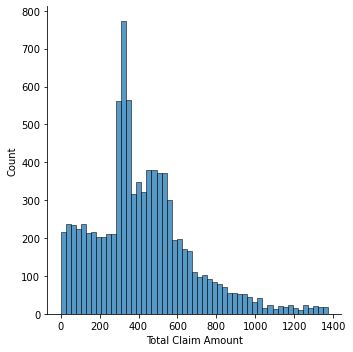

In [294]:
# I will first remove the outliers
iqr = np.percentile(numerical['Total Claim Amount'],75) - np.percentile(numerical['Total Claim Amount'],25)
upper_limit = np.percentile(numerical['Total Claim Amount'],75) + 3*iqr
lower_limit = np.percentile(numerical['Total Claim Amount'],25) - 3*iqr
numerical = numerical[(numerical['Total Claim Amount']>lower_limit) & (numerical['Total Claim Amount']<upper_limit)]
sns.displot(numerical['Total Claim Amount'])
plt.show()


In [295]:
numerical['Total Claim Amount'].describe()

count    9019.000000
mean      418.073889
std       252.397471
min         0.099007
25%       268.471802
50%       379.200000
75%       542.400000
max      1373.258272
Name: Total Claim Amount, dtype: float64

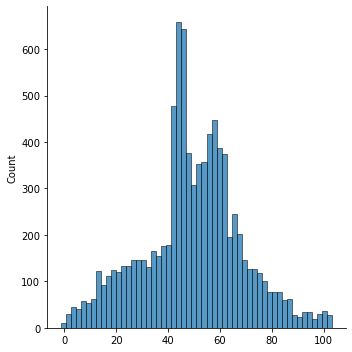

In [296]:
# I apply the Box Cox data transformation to reduce the scale of the values
#and make it more towards a Normal Distribution

from scipy import stats
xt, lmbda = stats.boxcox(numerical['Total Claim Amount'])
sns.displot(xt)
plt.show()

In [297]:
#One Hot/Label Encoding (categorical).

In [298]:
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [299]:
categorical.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [300]:
# I will chose one categorical column that affects
#most the Total Claim Amount
reduced_categorical = categorical[['Gender']] #we need to add two brackets so it transforms
#from 1D column to a data frame

In [301]:
reduced_categorical.head()

,Gender
0,F
1,F
2,F
3,M
4,M


In [302]:
reduced_categorical.value_counts()

Gender
F         4658
M         4476
dtype: int64

In [303]:
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder().fit(reduced_categorical)

In [304]:
pd.DataFrame(encoder.transform(reduced_categorical).toarray(),columns=encoder.categories_)

,F,M
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
9129,0.0,1.0
9130,1.0,0.0
9131,0.0,1.0
9132,0.0,1.0


In [305]:
one_hot_encoded = pd.DataFrame(encoder.transform(reduced_categorical).toarray(),columns=encoder.categories_).drop(['M'],axis=1)
one_hot_encoded.head()

,F
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0


In [306]:
## Concat DataFrames

In [307]:
# Dropping Total Claim Amount as it is our y and if not, the model would already 
#know the value so it would have no sense to make the predictions.

X = reduced_numerical.drop(['Total Claim Amount'],axis=1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto
0,2763.519279,56274,69
1,6979.535903,0,94
2,12887.431650,48767,108
3,7645.861827,0,106
4,2813.692575,43836,73
...,...,...,...
9129,23405.987980,71941,73
9130,3096.511217,21604,79
9131,8163.890428,0,85
9132,7524.442436,21941,96


In [308]:
X = pd.concat([X,one_hot_encoded],axis=1)

X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,"(F,)"
0,2763.519279,56274,69,1.0
1,6979.535903,0,94,1.0
2,12887.431650,48767,108,1.0
3,7645.861827,0,106,0.0
4,2813.692575,43836,73,0.0


### Use a different ratio of train test split

In [309]:
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: Total Claim Amount, dtype: float64

In [310]:
X.shape

(9134, 4)

In [325]:
# Creating the split between train-test for X and y
# Using a different ratio: from 0.25 to 0.5

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50,random_state=100)

In [326]:
print(X_train.shape) #75% of the X shape into train
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(4567, 4)
(4567, 4)
(4567,)
(4567,)


In [327]:
X_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,"(F,)"
4226,5970.816921,25125,81,1.0
6100,4799.621411,0,65,1.0
3414,3539.971590,0,99,1.0
1540,6871.966648,0,196,1.0
1367,8024.992989,38702,101,1.0


In [328]:
y_train.head()

4226     583.200000
6100     312.000000
3414    1158.858027
1540     940.800000
1367     253.364333
Name: Total Claim Amount, dtype: float64

In [329]:
X_test.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,"(F,)"
7175,5112.570311,56587,65,0.0
7255,4882.286714,21236,123,1.0
2846,5488.931031,33881,68,1.0
1211,3700.385003,17557,96,1.0
4294,8679.838135,52717,109,1.0


In [330]:
y_test.head()

7175    312.000000
7255    131.262395
2846     65.659137
1211    666.724937
4294     60.151529
Name: Total Claim Amount, dtype: float64

### Try to improve the linear regression model.

In [331]:
## Apply linear regression.

In [332]:
model = linear_model.LinearRegression() 
model = model.fit(X_train, y_train)

In [333]:
model.score(X_train, y_train)

0.5427715730106859

Model improved from Lab Solution 6 which had a model score of 0.52

In [334]:
model.predict(X_test)

array([242.36896968, 640.94028498, 298.99982014, ..., 259.28744699,
       321.99420276, 446.33568301])

Comparing by eye the model.predict(X_test) values with the y_test values, we can see that the predictions are not sufficiently close to the test data we have. However, we have to do the model validation methods to understand if the model is good enough or not.

#### Model Validation measures

### R2.

In [335]:
from sklearn.metrics import r2_score

r2_score(y_test,model.predict(X_test))
predicted = model.predict(X_test)

r2 = r2_score(y_test, predicted)

r2

0.5010321846881958

The model is mediocre at predicting the Total Claim Amount of the customers from my data. 
It should be closer to 1 than to 0 to be at least more than mediocre to predict the y value.

Model improved from Lab Solution 6 which had an R2 of 0.485

### MSE. & RMSE.

In [336]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predicted)
print(mse)

41260.5033820091


In [337]:
from sklearn import linear_model
import math

rmse = math.sqrt(mse)
print(rmse)

203.12681600913527


The average mistakes from the prediction model is expected to be 203.13$, which is a huge average error.
Considering the average error value, we can say that the model is not good enough to make predictions.

### MAE

In [338]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,predicted)
print('MAE: %.3f' % mae) #reducing decimals to 3

MAE: 145.529


The performance of the model when making predictions on new data is a mean absolute error of about 145.529 dollars

Model improved: Lab Solution 6 had a MAE of 147.441